In [1]:
# Author: Umut Mehmet ERDEM - 2024

import matplotlib.pyplot as plt
import numpy as np

"""
@brief Writes image data to a file in PGM format (P2 or P5).
@param1 magicnum: Magic number representing the PGM format (P2 for ASCII, P5 for binary).
@param2 filename: Path of the file to write the image data.
@param3 width: Width of the image.
@param4 height: Height of the image.
@param5 maxval: Maximum pixel value.
@param6 data: 2D list containing the image pixel data.
@retval None
"""
def mypgmwrite(magicnum, filename, width, height, maxval, data):
    with open(filename, 'wb') as f:
        f.write(f'{magicnum}\n#{filename}\n{width} {height}\n{maxval}\n'.encode())
        for row in data:
            for i in row: f.write(bytes([int(i)])) if magicnum == "P5" else f.write(f"{int(i)} ".encode())
            if magicnum == "P2": f.write('\n'.encode())

"""
@brief Reads image data from a PGM file (P2 or P5).
@param1 filename: Path of the file to read the image data from.
@retval magicnum: Magic number representing the PGM format (P2 for ASCII, P5 for binary).
@retval width: Width of the image.
@retval height: Height of the image.
@retval maxval: Maximum pixel value.
@retval data: 2D list containing the image pixel data.
"""
def mypgmread(filename):
    with open(filename, 'rb') as f:

        def read_and_cntrl():
            line = f.readline().strip()
            while line.startswith(b'#'):
                line = f.readline().strip()
            return line
        
        magicnum = read_and_cntrl()
        width, height = map(int, read_and_cntrl().split())
        maxval = int(read_and_cntrl())

        data = []
        if magicnum == b'P5':
            for i in range(height):
                data.append(list(f.read(width)))
        else:
            for i in range(height):
                data.append(list(map(int, read_and_cntrl().split())))

        print(f"{magicnum}\n{width} {height}\n{maxval}")
        for i in data: print(*i, sep=" ")
        return magicnum, width, height, maxval, data
    
"""
@brief Modifies the pixel values of a 2D list.
@param1 data: 2D list containing the image pixel data.
@param2 start_row: Starting row index.
@param3 end_row: Ending row index.
@param4 start_col: Starting column index.
@param5 end_col: Ending column index.
@param6 new_value: New pixel value.
@retval data: 2D list containing the modified image pixel data.
"""
def modify_pixels(data, start_row, end_row, start_col, end_col, new_value):
    for i in range(start_row, end_row + 1):
        for j in range(start_col, end_col + 1):
            data[i][j] = new_value
    return data

"""
@brief Creates the negative of an image by modifying the pixel values of a 2D list.
@param1 maxval: Maximum pixel value.
@param2 data: 2D list containing the image pixel data.
@retval f_negative: 2D list containing the negative image pixel data.
"""
def myImageNegative(maxval, data):
    f_negative = []
    for i in range(len(data)):
        f_negative.append([0] * len(data[i]))
        for j in range(len(data[i])):
            f_negative[i][j] = maxval - data[i][j]
    return f_negative

"""
@brief Normalizes the pixel values of a 2D list to the range [0, 255].
@param1 data: 2D list containing the image pixel data.
@retval normalized_data: 2D list containing the normalized image pixel data.
"""
def normalize(data):
    min_val, max_val = np.min(data), np.max(data)
    normalized_data = [[np.uint8((i-min_val)/(max_val-min_val)*255) for i in row] for row in data]
    return normalized_data

"""
@brief Applies logarithmic transformation to the given image data.
@param1 c: Constant value for the transformation.
@param2 data: 2D list containing the image pixel data.
@retval f_logTransformation: 2D list containing the transformed image pixel data.
"""
def myLogTransformation(c, data):
    f_logTransformation = []
    for i in range(len(data)):
        f_logTransformation.append([0] * len(data[i]))
        for j in range(len(data[i])):
            f_logTransformation[i][j] = c*np.log(1+data[i][j])
    
    f_logTransformation = normalize(f_logTransformation)
    return f_logTransformation

"""
@brief Applies gamma transformation to the given image data.
@param1 c: Constant value for the transformation.
@param2 gamma_val: Gamma value for the transformation.
@param3 data: 2D list containing the image pixel data.
@retval f_gammaTransformation: 2D list containing the transformed image pixel data.
"""
def myGammaTransformation(c, gamma_val, data):
    f_gammaTransformation = []
    for i in range(len(data)):
        f_gammaTransformation.append([0] * len(data[i]))
        for j in range(len(data[i])):
            f_gammaTransformation[i][j] = c*(data[i][j]**gamma_val)
    
    f_gammaTransformation = normalize(f_gammaTransformation)
    return f_gammaTransformation

"""
@brief Applies correlation operation on the given image data using the provided kernel.
@param1 kernel: 2D list containing the kernel values.
@param2 data: 2D list containing the image pixel data.
@param3 avarage: if set to 1, the kernel is averaged.
@param4 normalization: if set to 1, the resulting image is normalized.
@retval f_correlation: 2D list containing the correlated image pixel data.
"""
def myImageCorrelation(kernel, data, avarage=1, normalization=1):
    x_kernel, y_kernel = np.size(kernel, 0), np.size(kernel, 1)
    x_data, y_data = np.size(data, 0), np.size(data, 1)
    pad_size_x, pad_size_y = x_kernel // 2, y_kernel // 2
    pad_data = np.pad(data, ((pad_size_x, pad_size_x), (pad_size_y, pad_size_y)), mode='constant', constant_values=0)
    f_correlation = np.zeros_like(data, dtype=float)
    average = np.sum(np.abs(kernel)) if avarage else 1

    for i in range(x_data):
        for j in range(y_data):
            region = pad_data[i:i + x_kernel, j:j + y_kernel]
            f_correlation[i, j] = np.sum(region * kernel) / average
    if normalization: f_correlation = normalize(f_correlation)
    
    return f_correlation

"""
@brief Applies median filtering to the given image data.
@param1 kernel_size: Size of the kernel (must be an odd number).
@param2 data: 2D list or numpy array containing the image pixel data.
@retval f_median: 2D numpy array containing the filtered image pixel data.
"""
def myImageMedian(kernel_size, data):
    pad_size = kernel_size//2
    pad_data = np.pad(data, pad_size, mode='constant', constant_values=0)
    
    f_median = np.zeros_like(data)
    
    for i in range(len(data)):
        for j in range(len(data[i])):
            kernel = pad_data[i:i + kernel_size, j:j + kernel_size]
            f_median[i, j] = np.median(kernel)
    
    return f_median

In [2]:
magicnum, width, height, maxval, data = mypgmread("Fig0338(a).pgm")

b'P5'
466 540
255
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

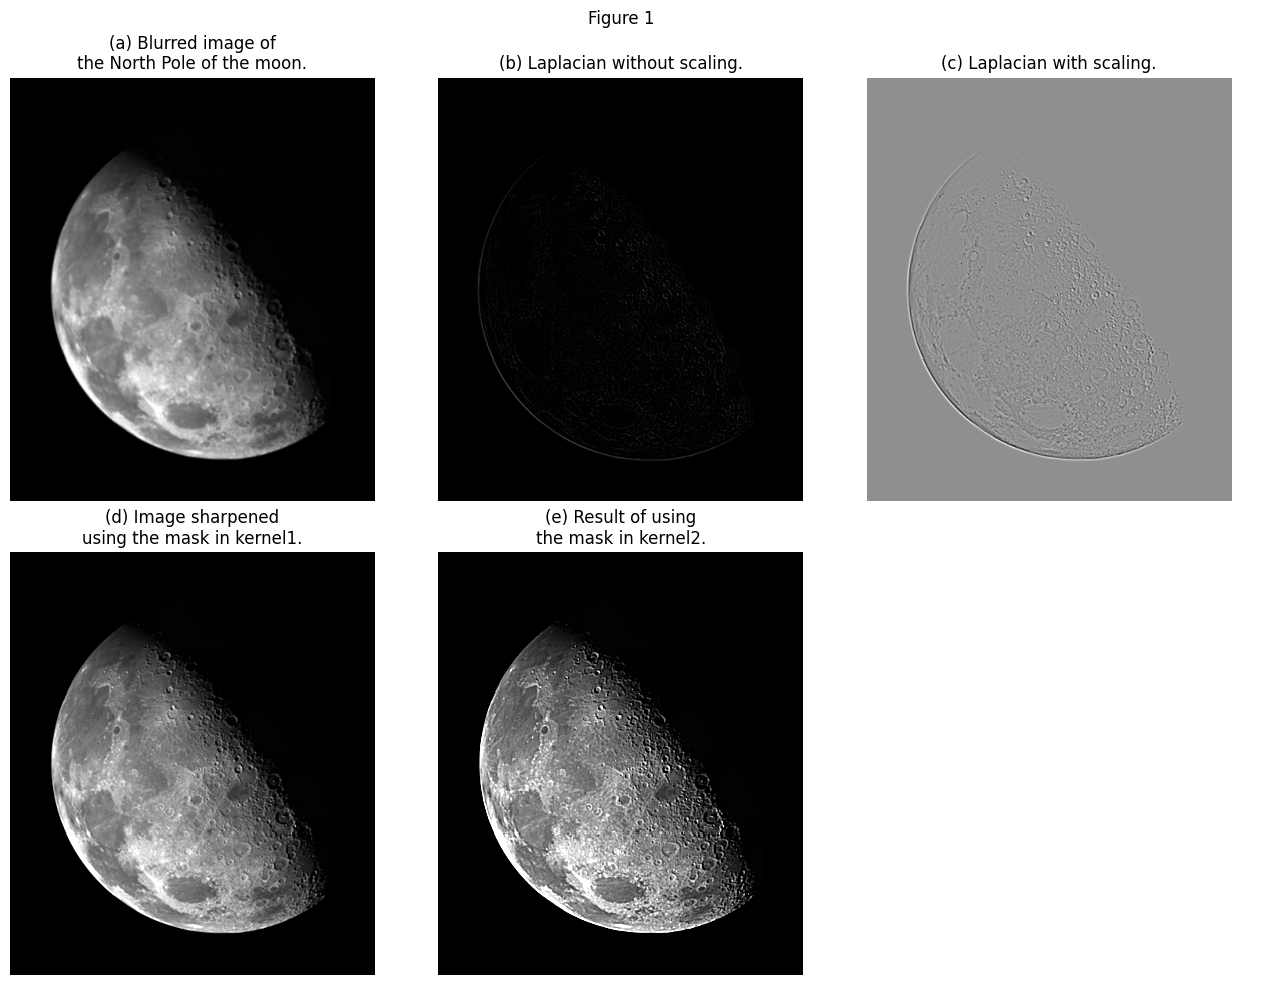

In [3]:
kernel1 = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
kernel2 = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]])
"""
@brief Applies Laplacian filter to the given image data using the provided kernel.
@param1 kernel: 2D array containing the kernel values.
@param2 data: 2D array containing the image pixel data.
@param3 normalization: if set to 1, the resulting image is normalized.
@retval 2D array containing the Laplacian filtered image pixel data.
"""
def myImageLaplacian(kernel, data, normalization=0):
    if not normalization: return myImageCorrelation(kernel, data, 0, 0)
    else: return myImageCorrelation(kernel, data, 1, 1)

"""
@brief Applies sharpening filter to the given image data using the provided kernel.
@param1 kernel: 2D array containing the kernel values.
@param2 data: 2D array containing the image pixel data.
@retval f_sharpened: 2D array containing the sharpened image pixel data.
"""
def myImageSharpe(kernel, data):
    f_sharpened = myImageLaplacian(kernel, data, 0)
    return np.subtract(data, f_sharpened)

f_laplacian1, f_laplacian2 = myImageLaplacian(kernel1, data, 0), myImageLaplacian(kernel1, data, 1)
f_laplacian1[f_laplacian1<0], f_sharpened1, f_sharpened2 = 0, myImageSharpe(kernel1, data), myImageSharpe(kernel2, data)

fig, ax = plt.subplots(2, 3, figsize=(13, 10))
ax[0, 0].axis("off"), ax[0, 1].axis("off"), ax[0, 2].axis("off"), ax[1, 0].axis("off"), ax[1, 1].axis("off"), ax[1,2].axis("off")
ax[0, 0].imshow(data, cmap="gray", vmin=0, vmax=255), ax[0, 1].imshow(f_laplacian1, cmap="gray", vmin=0, vmax=255), ax[0, 2].imshow(f_laplacian2, cmap="gray")
ax[1, 0].imshow(f_sharpened1, cmap="gray", vmin=0, vmax=255), ax[1, 1].imshow(f_sharpened2, cmap="gray", vmin=0, vmax=255)
ax[0, 0].set_title("(a) Blurred image of\nthe North Pole of the moon."), ax[0, 1].set_title("(b) Laplacian without scaling."), ax[0, 2].set_title("(c) Laplacian with scaling.")
ax[1, 0].set_title("(d) Image sharpened\nusing the mask in kernel1."), ax[1, 1].set_title("(e) Result of using\nthe mask in kernel2.")
fig.suptitle("Figure 1")
fig.tight_layout()
plt.show()


Figure 1'deki orijinal resmin kernel1'e göre Laplacian filtresi alındığında ve clip işlemi yapılarak negatif değerler 0'a atandığında şekil üzerindeki keskin hatlar filtrelenmektedir. Clip işlemi yapılmadığında ise negatif değerler görüntülenirken 255'e atanmış bir şekilde işlem göreceğinden çok fazla beyaz pixel oluşmaktadır. Ayrıca Laplacian  Filtresi alınırken korelasyon sırasında kernel'e göre pixel ortalaması alınması keskin hatların belirlenmesini zayıflatmaktadır. Eğer, Figure 1(d) şıkkı elde edilirken orjinal görüntüden keskin görüntü çıkarıldıktan sonra görüntüyü 0-255 aralığına normalize edilirse görüntü gri bir görünüm almaktadır. Kitapta gösterildiği gibi kernel1'den kernel2 oluşturulması aşamasında 0 olan pixellere 1 ataması ve merkez pixel'in -8 yapılması aşamalarına dikkat edilirse ve buna göre görüntünün daha keskin olması amacıyla [[1,2,1], [2,-12,2], [1,2,1]] kernel'i ile keskinleştirme işlemi yapılırsa, istenildiği gibi bir görüntü alınmaktadır. Buna göre, merkez pixel ile çevre pixellerin değerlerinin arasındaki farkın açılması görüntünün daha keskinleştirilmesine olanak tanımaktadır.

In [4]:
magicnum, width, height, maxval, data = mypgmread("Fig0340(a).pgm")

b'P5'
320 138
255
51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51
51 51 51 51 51 51 51 5

In [5]:
"""
@brief Creates a Gaussian kernel.
@param1 size: Size of the kernel (must be an odd number).
@param2 sigma: Standard deviation of the Gaussian distribution.
@retval kernel: 2D numpy array containing the Gaussian kernel values.
"""
def myGaussianKernel(size, sigma=1):
    center = size // 2
    kernel = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            x, y = i - center, j - center
            kernel[i, j] = (1 / (2*np.pi * sigma**2)) * np.exp(-(x**2 + y*2) / (2 * sigma**2))
    return kernel

"""
@brief Applies Gaussian blur to the given image data using the provided kernel.
@param1 kernel: 2D list containing the Gaussian kernel values.
@param2 data: 2D list containing the image pixel data.
@retval f_gaussian_blurredData: 2D list containing the blurred image pixel data.
"""
def myImageGaussian(kernel, data):
    f_gaussian_blurredData = myImageCorrelation(kernel, data, 1, 0)
    return f_gaussian_blurredData

f_gaussianKernel = myGaussianKernel(5, 3)
f_blurredData = myImageGaussian(f_gaussianKernel, data)

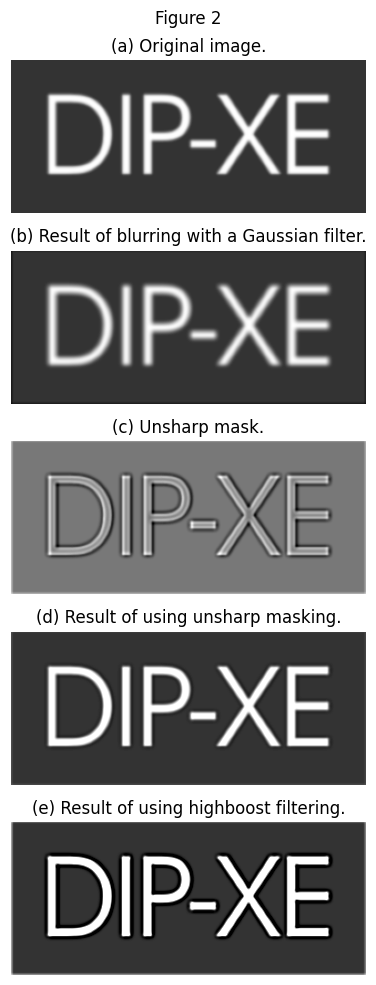

In [6]:
f_unsharpMask = np.subtract(data, f_blurredData)
f_unsharpened = np.add(data, f_unsharpMask)
f_highboostsharpened = np.add(data, 4.5*f_unsharpMask)
fig, ax = plt.subplots(5, 1, figsize=(5, 10))
ax[0].axis("off"), ax[1].axis("off"), ax[2].axis("off"), ax[3].axis("off"), ax[4].axis("off")
ax[0].imshow(data, cmap="gray", vmin=0, vmax=255), ax[1].imshow(f_blurredData, cmap="gray", vmin=0, vmax=255), ax[2].imshow(f_unsharpMask, cmap="gray"), ax[3].imshow(f_unsharpened, cmap="gray", vmin=0, vmax=255), ax[4].imshow(f_highboostsharpened, cmap="gray", vmin=0, vmax=255)
ax[0].set_title("(a) Original image."), ax[1].set_title("(b) Result of blurring with a Gaussian filter."), ax[2].set_title("(c) Unsharp mask."), ax[3].set_title("(d) Result of using unsharp masking."), ax[4].set_title("(e) Result of using highboost filtering.")
fig.suptitle("Figure 2")
fig.tight_layout()
plt.show()

Figure 2'deki orijinal görüntü yazılan myGaussianKernel fonksiyonu aracılığıyla kitapta verilen size ve sigma parametreleriyle Gaussian kernel oluşturulduktan sonra, myImageGaussian fonksiyonu içerisinde korelasyon işlemine tabii tutulmuştur. Korelasyon sırasında, kernel'e göre pixel ortalaması alınmış fakat ortaya çıkan görüntü normalize edilmeden işleme devam edilmiştir. Ayrıca, normalizasyon işlemi yapılırsa, arka plan rengi daha koyu bir görüntü almaktadır. Bu işlem sonrasında, orijinal görüntüden bulanık görüntü çıkartılmıştır. Bu noktada, orijinal görüntüdeki keskin yazı hatları, bulanıklaşan kenar hatlarından çıkartılarak yazının keskin hatlarının olduğu görüntü, yani Unsharp mask ortaya çıkmıştır. Ortaya çıkan maske orijinal görüntüye eklenerek orijinal görüntü keskinleştirilmiştir. Highboosting filtrelemesi yapmak için orijinal görüntü ile maskelenmiş görüntüyü toplama sırasında maskenin katsayı arttırılmalıdır. Bu değer ne kadar çok arttırılırsa yazı etrafındaki kontür ve buna bağlı olarak keskinleşme artmaktadır.  

In [7]:
"""
@brief Applies histogram equalization to the given image data.
@param1 L: The maximum intensity value in the image.
@param2 data: 2D array containing the image pixel data.
@retval f_equalized: 2D array containing the histogram equalized image pixel data.
"""
def histogram_equalization(L, data):
    data = np.array(data)
    histogram, bins = np.histogram(data, bins=L, range=(0, L))
    normalized_histogram = histogram / data.size
    cumulative_histogram = np.cumsum(normalized_histogram)
    transformation_function = (L - 1) * cumulative_histogram
    f_equalized = transformation_function[data.ravel()].reshape(data.shape).astype(np.uint8)
    
    return bins, normalized_histogram, cumulative_histogram, f_equalized

In [8]:
datas = [mypgmread("Fig0320(1).pgm"), mypgmread("Fig0320(2).pgm"), mypgmread("Fig0320(3).pgm"), mypgmread("Fig0320(4).pgm")]

b'P5'
500 500
255
13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 17 19 13 13 16 17 19 19 16 13 13 13 13 13 13 13 13 13 13 13 17 17 16 16 20 26 28 28 26 26 26 29 30 29 26 25 29 33 35 31 30 28 26 27 29 31 32 32 31 30 31 33 36 39 42 47 44 41 38 34 33 34 36 38 42 44 39 33 30 35 40 43 39 37 38 41 44 44 42 42 41 41 42 42 44 46 46 43 39 38 39 44 44 38 31 29 34 38 39 39 38 36 34 31 30 28 22 17 13 13 13 26 51 60 65 66 63 61 54 56 62 68 68 66 66 67 68 68 68 68 68 65 60 61 64 65 65 65 64 62 62 65 68 71 66 65 65 63 60 58 57 63 66 69 69 67 65 65 66 66 68 70 68 69 70 57 39 43 47 53 55 55 55 56 59 58 56 55 55 55 56 56 56 62 64 64 60 58 58 63 66 64 64 62 61 59 55 47 42 46 42 54 51 29 28 44 50 62 62 60 65 69 60 46 40 35 46 51 47 48 47 39 32 49 38 27 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 1

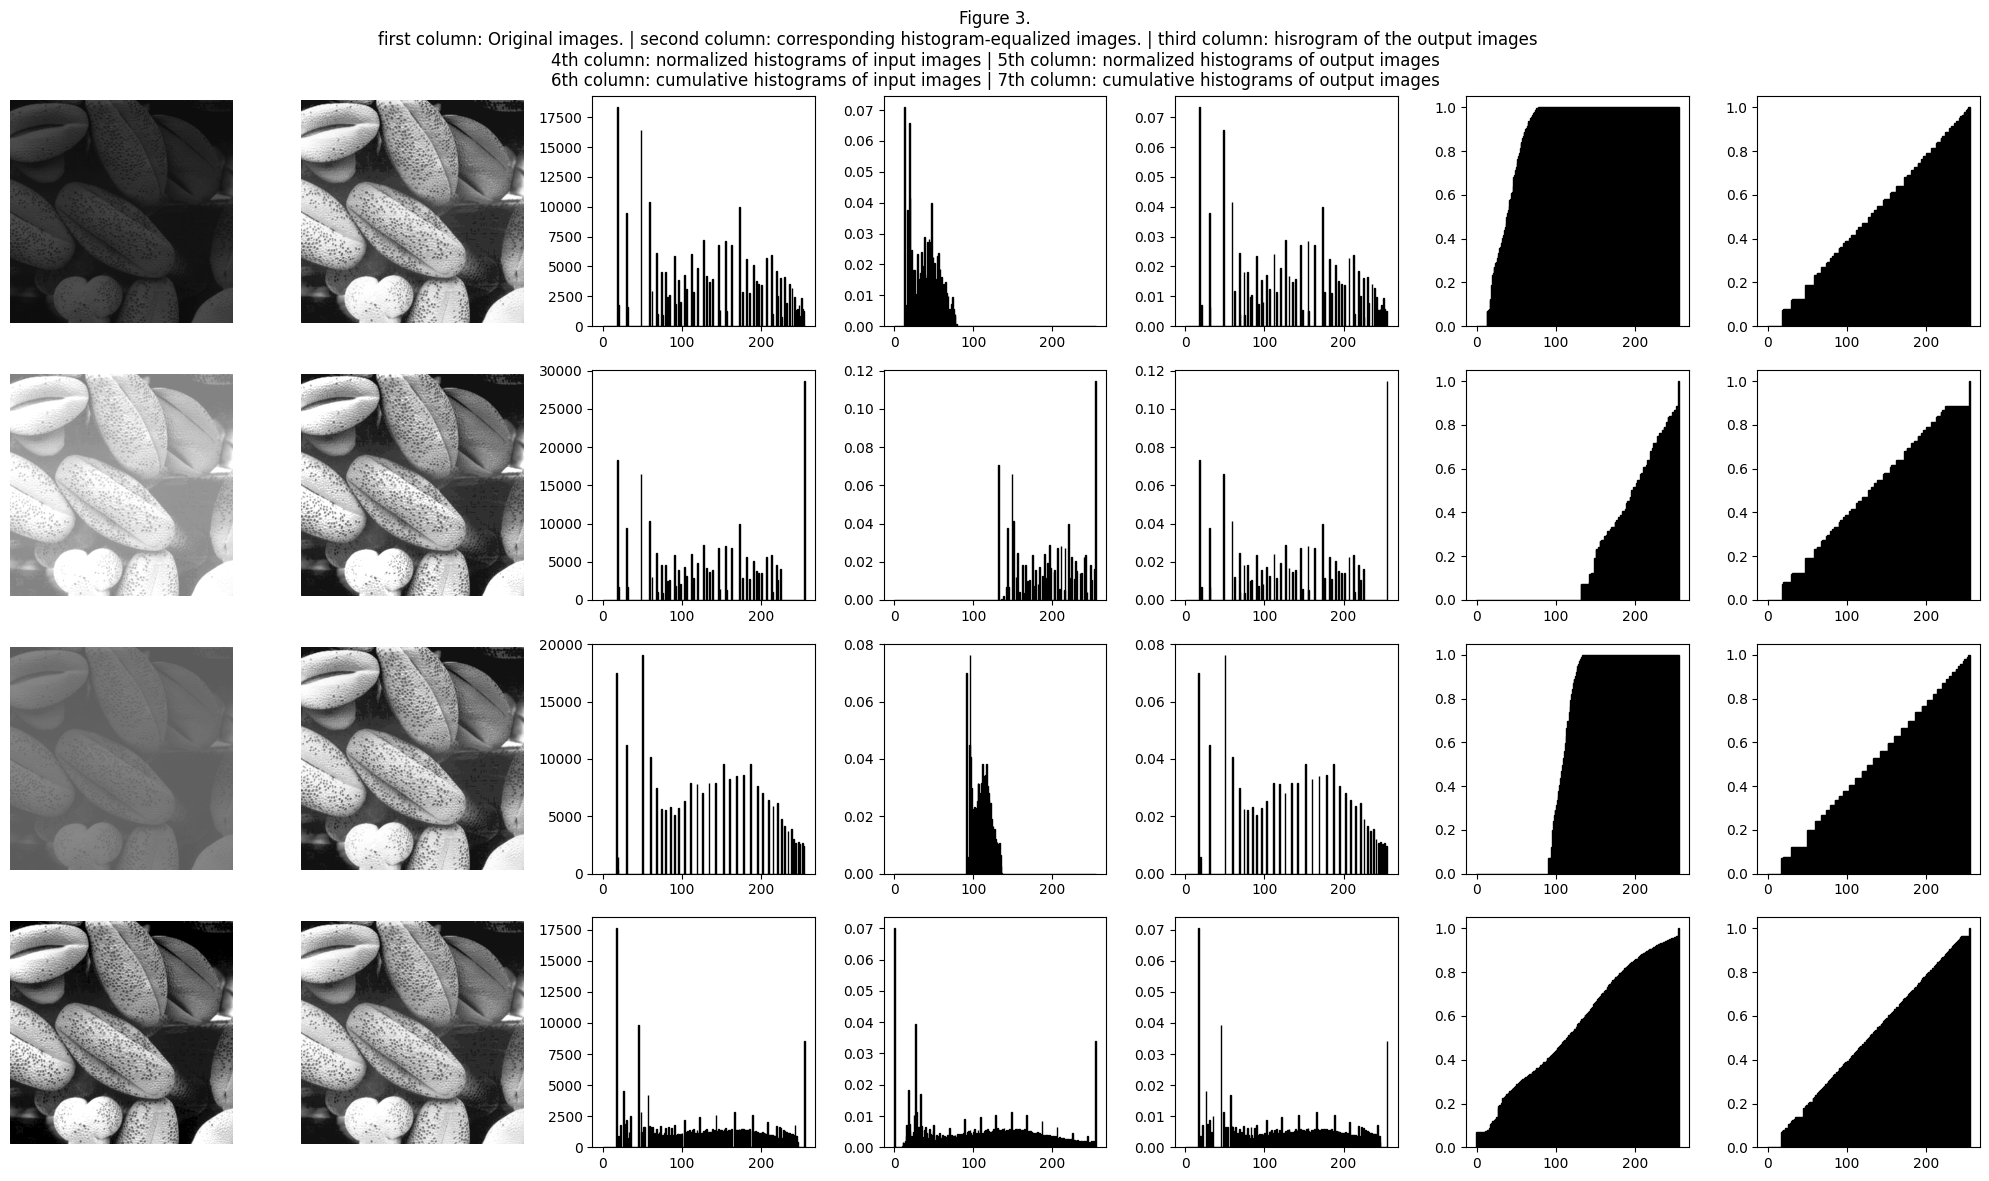

In [9]:
fig, ax = plt.subplots(4, 7, figsize=(20, 12))
for i in range(len(datas)):
    magicnum, width, height, maxval, data = datas[i]
    input_bins, input_normalized_histogram, input_cumulative_histogram, f_equalized = histogram_equalization(maxval+1, data)
    output_bins, output_normalized_histogram, output_cumulative_histogram, output_f_equalized = histogram_equalization(maxval+1, f_equalized)
    histogram_equalized, bins_histogram_equalized = np.histogram(f_equalized, bins=maxval+1, range=(0,maxval+1))
    ax[i, 0].axis("off"), ax[i, 1].axis("off")
    ax[i, 0].imshow(data, cmap="gray", vmin=0, vmax=255), ax[i, 1].imshow(f_equalized, cmap="gray", vmin=0, vmax=255), ax[i, 2].bar(bins_histogram_equalized[:-1], histogram_equalized, width=1, edgecolor='black')
    ax[i, 3].bar(input_bins[:-1], input_normalized_histogram, width=1, edgecolor='black'), ax[i, 4].bar(output_bins[:-1], output_normalized_histogram, width=1, edgecolor='black')
    ax[i, 5].bar(input_bins[:-1], input_cumulative_histogram, width=1, edgecolor='black'), ax[i, 6].bar(output_bins[:-1], output_cumulative_histogram, width=1, edgecolor='black')
fig.suptitle("Figure 3.\nfirst column: Original images. | second column: corresponding histogram-equalized images. | third column: hisrogram of the output images \
             \n4th column: normalized histograms of input images | 5th column: normalized histograms of output images\n6th column: cumulative histograms of input images | 7th column: cumulative histograms of output images")
fig.tight_layout()
plt.show()

Figure 3'deki orijinal giriş görüntülerine bakıldığında sondaki görüntü haricinde tüm görüntüler soluk veya karanlık görülmektedir ve buna bağlı olarak pixel renk aralığının yani olasılık yoğunluk fonksiyonun belirli bir aralığa sıkıştığı anlaşılmaktadır. Bu durum, 4. sütündaki giriş görüntülerinin normalize histogramları incelenerek de görülmektedir. 6. sütundaki giriş görüntülerinin kümülatif histogramları incelendiğinde, 7.sütündaki çıkış görüntülerinin kümülatif histogramlarına, olasılık yoğunluk fonksiyonlarının ise buna bağlı olarak uniform dağılıma dönüştüğü görülmüştür. Böylece 3.sütündaki çıkış histogramlarına bakılarak görüntü üzerindeki pixel değerlerinin tüm pixel değer aralığına dağıldığı ve buna bağlı olarak görüntünün netleşmesi ve detayların görünmesi sağlanmıştır.